In [46]:
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

# Defining the s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabriel-predictive-analytics'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
file_key = "MarketingData.csv"

bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading the csv file
marketing_data = pd.read_csv(file_content_stream)
marketing_data.head(1) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.09324,6019.057354,5669.568008,5898.660607,5179.234947,2


In [47]:
# Computing the number of observations in each of the marketing channels
marketing_data['Channel'].value_counts()

0    5007
3    5002
1    5001
2    4990
Name: Channel, dtype: int64

In [48]:
X = marketing_data['Channel'].value_counts()
X = pd.DataFrame(X)
X.head()

,Channel
0,5007
3,5002
1,5001
2,4990


<AxesSubplot:>

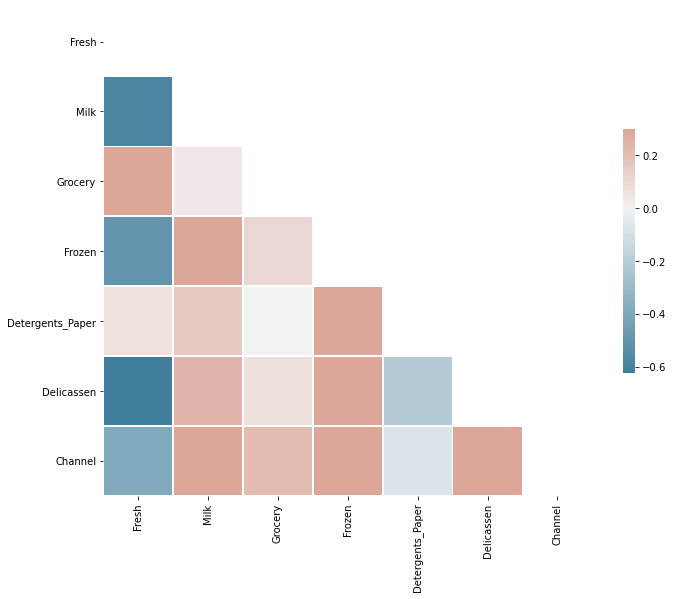

In [49]:
import seaborn as sns
# Compute the correlation matrix
corr = marketing_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
# Selecting input and target variables
X = marketing_data.drop(columns = 'Channel', axis = 1)
Y = marketing_data['Channel']

# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y)

In [52]:
## OneVsRest strategy with logistic regression
one_vs_Rest_tree = OneVsRestClassifier(estimator = DecisionTreeClassifier()).fit(X_train, Y_train)

## Predicting on the test dataset
one_vs_Rest_tree_preds = one_vs_Rest_tree.predict(X_test)

## Computing the confusion matrix to evaluate the predictions
print(classification_report(Y_test, one_vs_Rest_tree_preds))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1002
           1       0.86      0.72      0.79      1000
           2       0.90      0.86      0.88       998
           3       0.68      0.92      0.78      1000

    accuracy                           0.82      4000
   macro avg       0.84      0.82      0.82      4000
weighted avg       0.84      0.82      0.82      4000



In [53]:
## OneVsOne strategy with logistic regression
one_vs_one_tree = OneVsOneClassifier(estimator = DecisionTreeClassifier()).fit(X_train, Y_train)

## Predicting on the test dataset
one_vs_one_tree_preds = one_vs_one_tree.predict(X_test)

## Computing the confusion matrix to evaluate the predictions
print(classification_report(Y_test, one_vs_one_tree_preds))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1002
           1       0.81      0.80      0.80      1000
           2       0.89      0.87      0.88       998
           3       0.81      0.87      0.84      1000

    accuracy                           0.84      4000
   macro avg       0.85      0.84      0.84      4000
weighted avg       0.85      0.84      0.84      4000



### Given the above models, I would OneVsOne model to predict channel's class because it provided more balanced results between all classes.